In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
client_df = pd.read_csv('../data/01_raw/client_data.csv')
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [105]:
price_df = pd.read_csv('../data/01_raw/price_data.csv')
price_df.info()
price_df.head()
price_df['price_date'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


price_date
2015-12-01    16094
2015-08-01    16094
2015-07-01    16090
2015-11-01    16087
2015-10-01    16085
2015-06-01    16085
2015-09-01    16082
2015-02-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

In [32]:
client_df['id'].value_counts().sort_index(ascending=False)

id
ffff7fa066f1fb305ae285bb03bf325a    1
fffe4f5646aa39c7f97f95ae2679ce64    1
fffc0cacd305dd51f316424bbb08d1bd    1
fffac626da707b1b5ab11e8431a4d0a2    1
ffebf6a979dd0b17a41076df1057e733    1
                                   ..
0013f326a839a2f6ad87a1859952d227    1
00114d74e963e47177db89bc70108537    1
0010bcc39e42b3c2131ed2ce55246e3c    1
0004351ebdd665e6ee664792efc4fd13    1
0002203ffbb812588b632b9e628cc38d    1
Name: count, Length: 14606, dtype: int64

In [33]:
price_df['id'].value_counts().sort_index(ascending=False)

id
ffff7fa066f1fb305ae285bb03bf325a    12
fffe4f5646aa39c7f97f95ae2679ce64    12
fffc0cacd305dd51f316424bbb08d1bd    12
fffac626da707b1b5ab11e8431a4d0a2    12
ffef185810e44254c3a4c6395e6b4d8a    12
                                    ..
00114d74e963e47177db89bc70108537    12
0010ee3855fdea87602a5b7aba8e42de    12
0010bcc39e42b3c2131ed2ce55246e3c    12
0004351ebdd665e6ee664792efc4fd13    12
0002203ffbb812588b632b9e628cc38d    12
Name: count, Length: 16096, dtype: int64

In [34]:
price_df[price_df['id'] == 'ffff7fa066f1fb305ae285bb03bf325a']

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
115453,ffff7fa066f1fb305ae285bb03bf325a,2015-01-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
115454,ffff7fa066f1fb305ae285bb03bf325a,2015-02-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
115455,ffff7fa066f1fb305ae285bb03bf325a,2015-03-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
115456,ffff7fa066f1fb305ae285bb03bf325a,2015-04-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
115457,ffff7fa066f1fb305ae285bb03bf325a,2015-05-01,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
115458,ffff7fa066f1fb305ae285bb03bf325a,2015-06-01,0.129444,0.106863,0.075004,40.565973,24.339578,16.226383
115459,ffff7fa066f1fb305ae285bb03bf325a,2015-07-01,0.128077,0.106401,0.076311,40.728885,24.437330,16.291555
115460,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
115461,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555
115462,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.437330,16.291555


In [ ]:
# # price_df 최신데이터만 중복 제거
# price_df = price_df.sort_values('price_date', ascending=False).drop_duplicates(subset='id', keep='first')
# price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16096 entries, 193001 to 172717
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  16096 non-null  object 
 1   price_date          16096 non-null  object 
 2   price_off_peak_var  16096 non-null  float64
 3   price_peak_var      16096 non-null  float64
 4   price_mid_peak_var  16096 non-null  float64
 5   price_off_peak_fix  16096 non-null  float64
 6   price_peak_fix      16096 non-null  float64
 7   price_mid_peak_fix  16096 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# 데이터셋 join 진행 id 기준
total_df = pd.merge(client_df, price_df, on = 'id')
total_df.info()
total_df['churn'].value_counts().sort_index()

# 결측치 없음
total_df.isna().sum()
# 중복치 없음
total_df.duplicated().sum()

np.int64(0)

# 데이터 컬럼 명세서 (Data Column Descriptions)

이 문서는 모델링에 사용되는 데이터(`data_for_model.csv`)의 컬럼들을 설명합니다.

## 1. 고객 정보 (Client Data)
| 컬럼명 | 설명 |
|---|---|
| `id` | 고객 식별자 |
| `channel_sales` | 판매 채널 코드 |
| `cons_12m` | 지난 12개월 전기 소비량 |
| `cons_gas_12m` | 지난 12개월 가스 소비량 |
| `cons_last_month` | 지난달 전기 소비량 |
| `date_activ` | 계약 활성화 날짜 |
| `date_end` | 계약 등록 마감 날짜 |
| `date_modif_prod` | 마지막 제품 수정 날짜 |
| `date_renewal` | 다음 계약 갱신 날짜 |
| `forecast_cons_12m` | 향후 12개월 예측 전기 소비량 |
| `forecast_cons_year` | 향후 1년 예측 소비량 |
| `forecast_discount_energy` | 에너지 할인 예측값 |
| `forecast_meter_rent_12m` | 향후 12개월 예측 계량기 임대료 |
| `forecast_price_energy_off_peak` | 비피크 시간대 에너지 예측 가격 |
| `forecast_price_energy_peak` | 피크 시간대 에너지 예측 가격 |
| `forecast_price_pow_off_peak` | 비피크 시간대 전력 예측 가격 |
| `has_gas` | 가스 사용 여부 (T/F) |
| `imp_cons` | 현재 지불된 소비량 |
| `margin_gross_pow_ele` | 전력 총 마진 |
| `margin_net_pow_ele` | 전력 순 마진 |
| `nb_prod_act` | 활성 제품 수 |
| `net_margin` | 총 순 마진 |
| `num_years_antig` | 고객 유지 연수 (Antiquity) |
| `origin_up` | 계약 체결 경로 (캠페인 등) |
| `pow_max` | 계약 전력량 (Power) |
| `churn` | **이탈 여부 (Target Variable)** (1: 이탈, 0: 유지) |

## 2. 가격 피처 (Price Features) - 파생 변수
가격 데이터(`price_data.csv`)를 고객 ID별로 집계하여 생성한 변수들입니다.
통계량 접미사: `_mean` (평균), `_max` (최대), `_min` (최소), `_std` (표준편차)

| 컬럼명 패턴 | 설명 |
|---|---|
| `price_off_peak_var_*` | 비피크 시간대 전력량 요금(변동) 통계 |
| `price_peak_var_*` | 피크 시간대 전력량 요금(변동) 통계 |
| `price_off_peak_fix_*` | 비피크 시간대 전력 요금(고정) 통계 |
| `price_peak_fix_*` | 피크 시간대 전력 요금(고정) 통계 |

## 3. 신규 생성 피처 (New Features)
| 컬럼명 | 설명 |
|---|---|
| `off_peak_diff` | 12월 가격 - 1월 가격 차이 (비피크 변동 요금 기준) |
| `max_volatility` | 연중 최대 가격 변동폭 (`price_off_peak_var`의 Max - Min) |
| `price_shock_encoded` | 가격 충격 그룹 인코딩 <br> `0`: Price Down (가격 하락) <br> `1`: No Change (변동 없음) <br> `2`: Price Up (가격 상승) |


In [48]:
total_df['cons_12m'].value_counts().sort_index()

cons_12m
0          1404
1            24
2            24
3            48
4            24
           ... 
4939487      48
5161456      48
5322441      12
5731448     168
6207104     216
Name: count, Length: 11065, dtype: int64

In [52]:
# 한달 이용 전력량 (total_df['cons_12m'] / 12)
# 피크, 비피크 비율 4:6
# 기본 전력량  total_df['price_off_peak_fix'] 한달비용
# 기본 전력량  total_df['price_peak_fix'] 한달비용
month_peak_fix = total_df['price_peak_fix']
month_off_fix = total_df['price_off_peak_fix']
month_peak_var = total_df['price_peak_var']
month_off_var = total_df['price_off_peak_var']
month_use = total_df['cons_12m'] / 12

total_df['total_price'] = month_peak_fix + month_off_fix + month_peak_var * month_use * 0.4 + month_off_var * month_use * 0.6
total_df.describe()

total_df['id'].value_counts()


id
563dde550fd624d7352f3de77c0cdfcd    12
24011ae4ebbe3035111d65fa7c15bc57    12
d29c2c54acc38ff3c0614d0a653813dd    12
764c75f661154dac3a6c254cd082ea7d    12
bba03439a292a1e166f80264c16191cb    12
                                    ..
61022f00c0541d5cf95c5b16e20db0eb     9
3e459d61dc831e29f8a9a9a59f95efd2     8
c5dcd5c506e565aaabffa29bc1ec0a37     7
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
Name: count, Length: 14606, dtype: int64

In [80]:
total_df['id'][total_df['churn'] == 1].value_counts()

id
10e6828ddd62cbcf687cb74928c4c2d2    12
24011ae4ebbe3035111d65fa7c15bc57    12
1aa498825382410b098937d65c4ec26d    12
7ab4bf4878d8f7661dfc20e9b8e18011    12
389bbbe70248fbeecdf9bb1bd0d1da04    12
                                    ..
4640add258927798f8a9c49442431a1e    11
7665cb89dbbdb498a4763d0f5f2c48a3    11
211d0b2012d921aad796e4cd4cc94067    11
2c2ff2f66da9433f98673c23526e8b3d    10
bf89f2d8c1b133a134fd93603cb4c947     7
Name: count, Length: 1419, dtype: int64

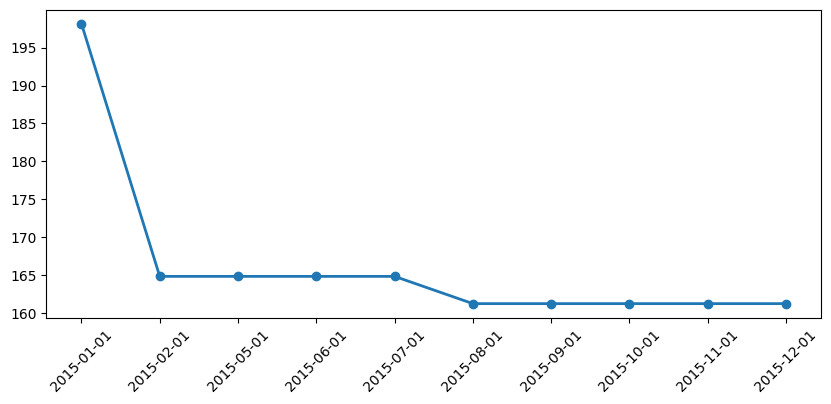

In [83]:
# 이탈한 사람의 전기요금 총가격 
target_id = '2c2ff2f66da9433f98673c23526e8b3d'
df_id = total_df[total_df['id'] == target_id].sort_values('price_date')
df_id
plt.figure(figsize=(10, 4))
plt.plot(
    df_id['price_date'],
    df_id['total_price'],
    marker='o',
    linewidth=2
)
plt.xticks(rotation=45)
# plt.plot(total_df['price_date'], total_df[total_df['id'] == '563dde550fd624d7352f3de77c0cdfcd'])
plt.show()

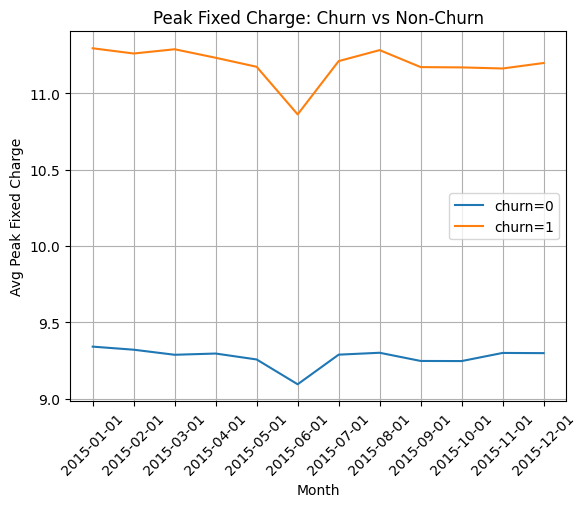

In [107]:
monthly_churn = (
    total_df
    .groupby(['price_date', 'churn'])['price_peak_fix']
    .mean()
    .reset_index()
)

for c in [0, 1]:
    temp = monthly_churn[monthly_churn['churn'] == c]
    plt.plot(
        temp['price_date'],
        temp['price_peak_fix'],
        label=f'churn={c}'
    )

plt.legend()
plt.xlabel('Month')
plt.ylabel('Avg Peak Fixed Charge')
plt.title('Peak Fixed Charge: Churn vs Non-Churn')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

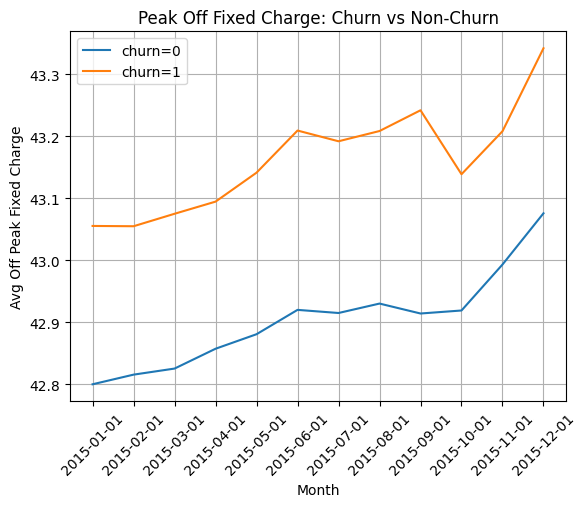

In [87]:
monthly_churn = (
    total_df
    .groupby(['price_date', 'churn'])['price_off_peak_fix']
    .mean()
    .reset_index()
)

for c in [0, 1]:
    temp = monthly_churn[monthly_churn['churn'] == c]
    plt.plot(
        temp['price_date'],
        temp['price_off_peak_fix'],
        label=f'churn={c}'
    )

plt.legend()
plt.xlabel('Month')
plt.ylabel('Avg Off Peak Fixed Charge')
plt.title('Peak Off Fixed Charge: Churn vs Non-Churn')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [56]:
total_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,total_price
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,64.905550
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,64.905550
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,64.905551
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,64.905551
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,64.905551


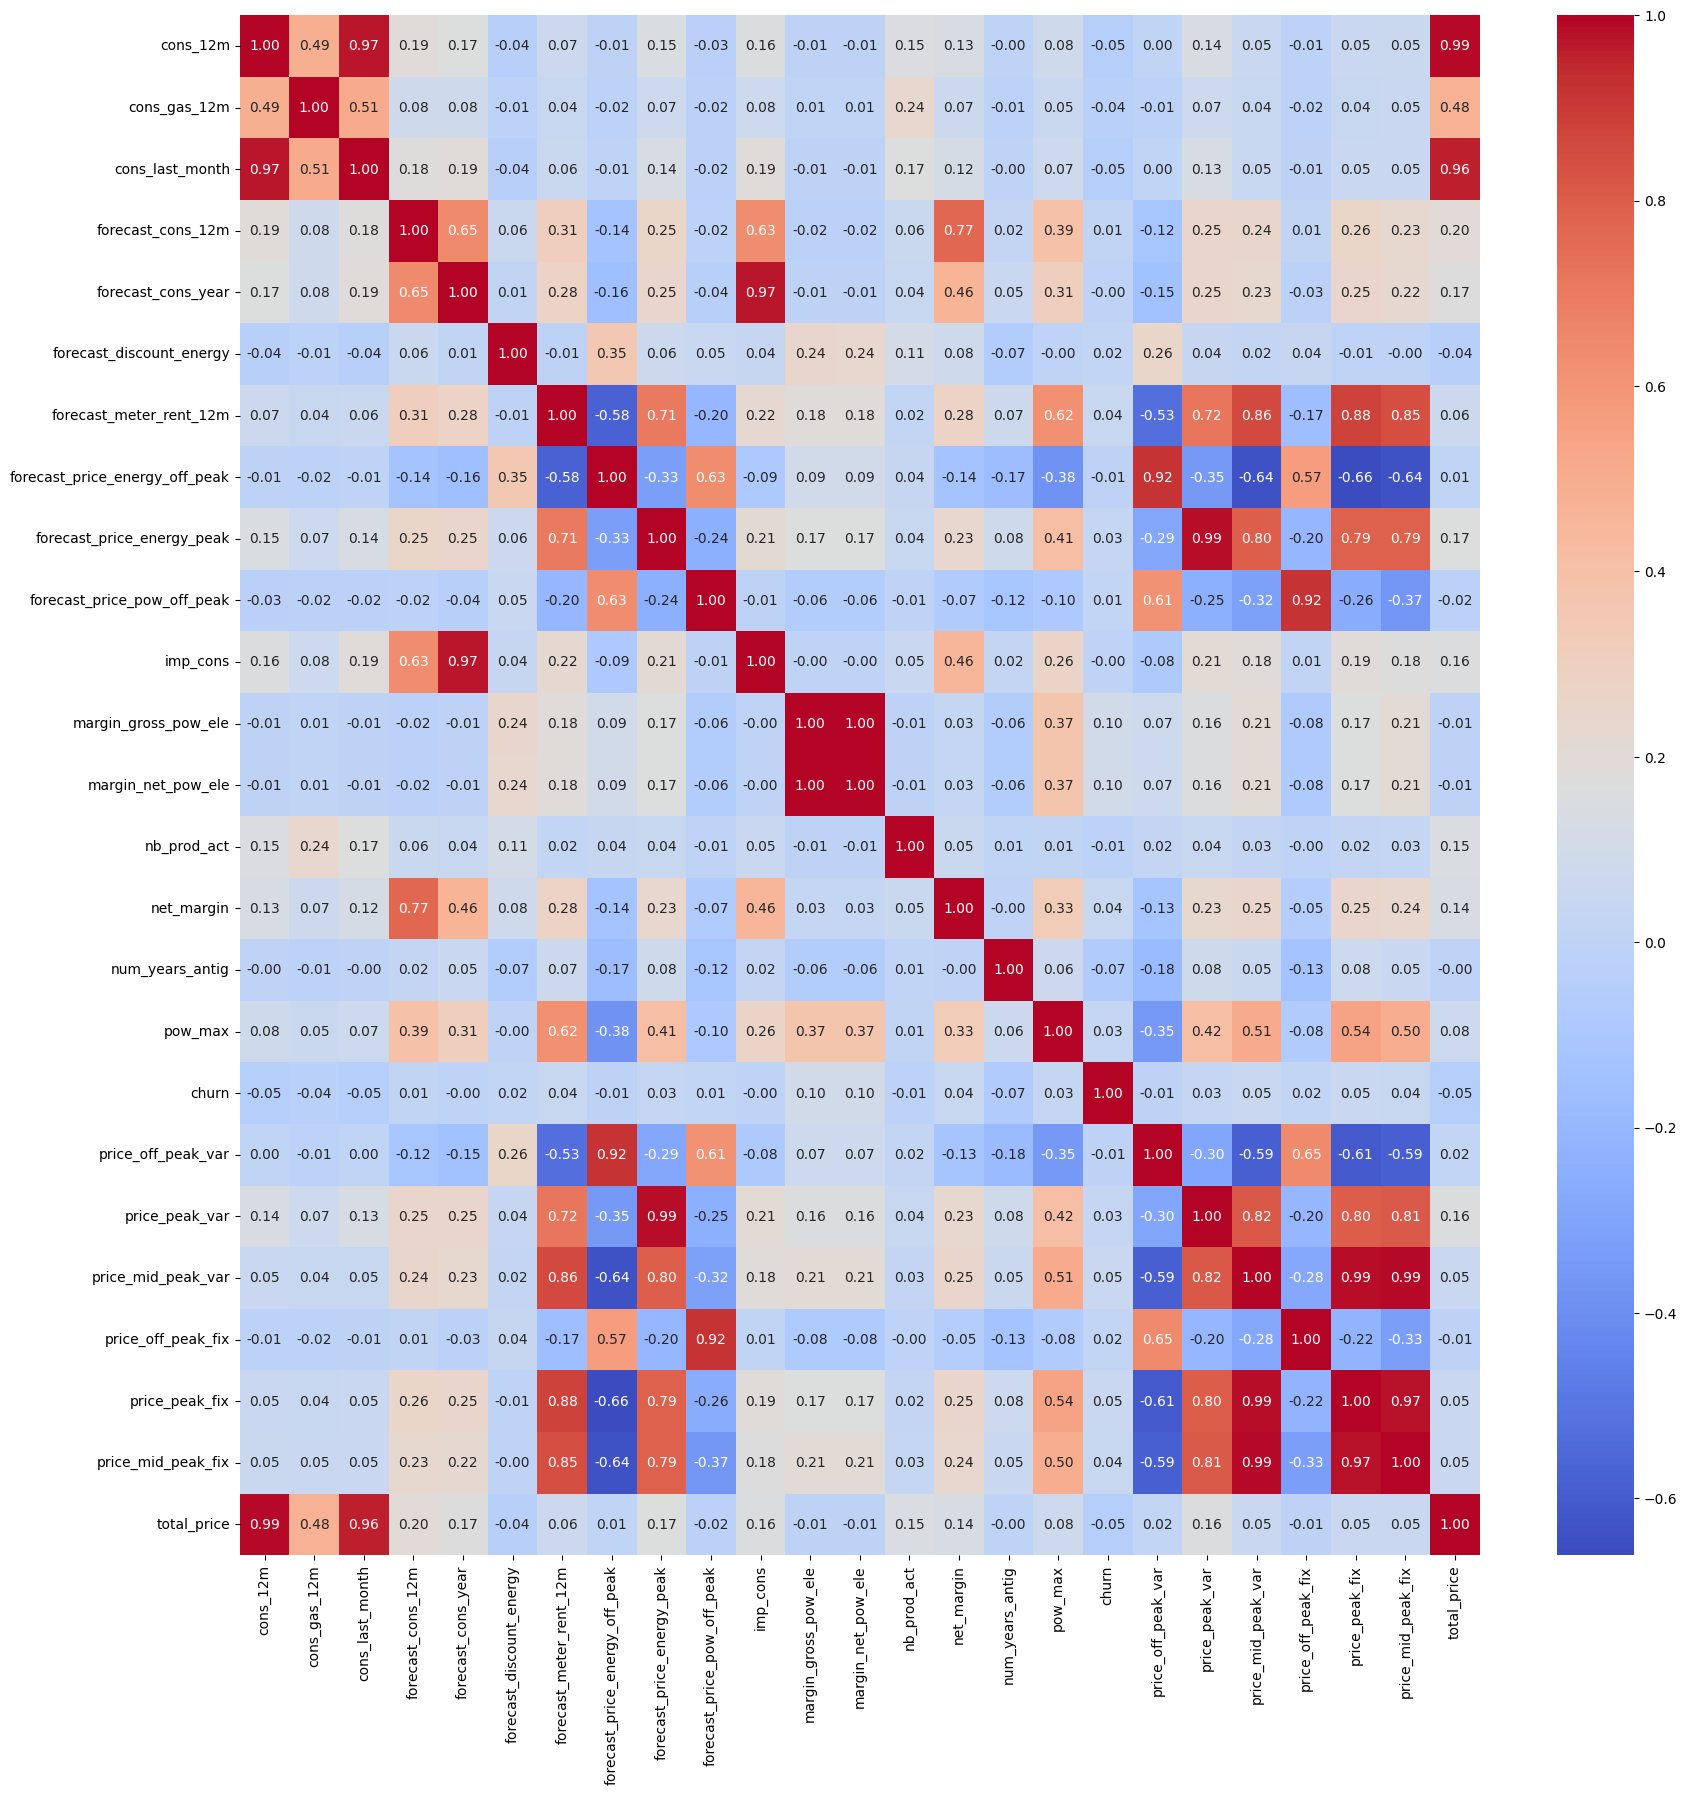

In [74]:
# 상관계수 매트릭스 도출
total_corr = total_df.corr(numeric_only=True)
total_corr

# 히트맵 시각화 
plt.figure(figsize=(20, 20))
sns.heatmap(total_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_df = total_df.select_dtypes(include='number')
type(numeric_df)

X = numeric_df.drop('churn', axis=1)

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index = X.index)
X_scaled_df.head()
total2_df = X_scaled_df
total2_df['churn'] = total_df['churn']
total2_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,num_years_antig,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,total_price,churn
0,-0.27768,0.164879,-0.250021,-0.782535,-0.430925,-0.189279,-0.926688,-0.926159,0.971848,-0.562438,...,-1.239782,1.884865,-0.700738,1.020893,1.199656,-0.511423,1.226442,1.295022,-0.268797,1
1,-0.27768,0.164879,-0.250021,-0.782535,-0.430925,-0.189279,-0.926688,-0.926159,0.971848,-0.562438,...,-1.239782,1.884865,-0.700738,1.020893,1.199656,-0.511423,1.226442,1.295022,-0.268797,1
2,-0.27768,0.164879,-0.250021,-0.782535,-0.430925,-0.189279,-0.926688,-0.926159,0.971848,-0.562438,...,-1.239782,1.884865,-0.700738,1.020893,1.199656,-0.511422,1.226442,1.295021,-0.268797,1
3,-0.27768,0.164879,-0.250021,-0.782535,-0.430925,-0.189279,-0.926688,-0.926159,0.971848,-0.562438,...,-1.239782,1.884865,-0.700738,1.020893,1.199656,-0.511422,1.226442,1.295021,-0.268797,1
4,-0.27768,0.164879,-0.250021,-0.782535,-0.430925,-0.189279,-0.926688,-0.926159,0.971848,-0.562438,...,-1.239782,1.884865,-0.700738,1.020893,1.199656,-0.511422,1.226442,1.295021,-0.268797,1


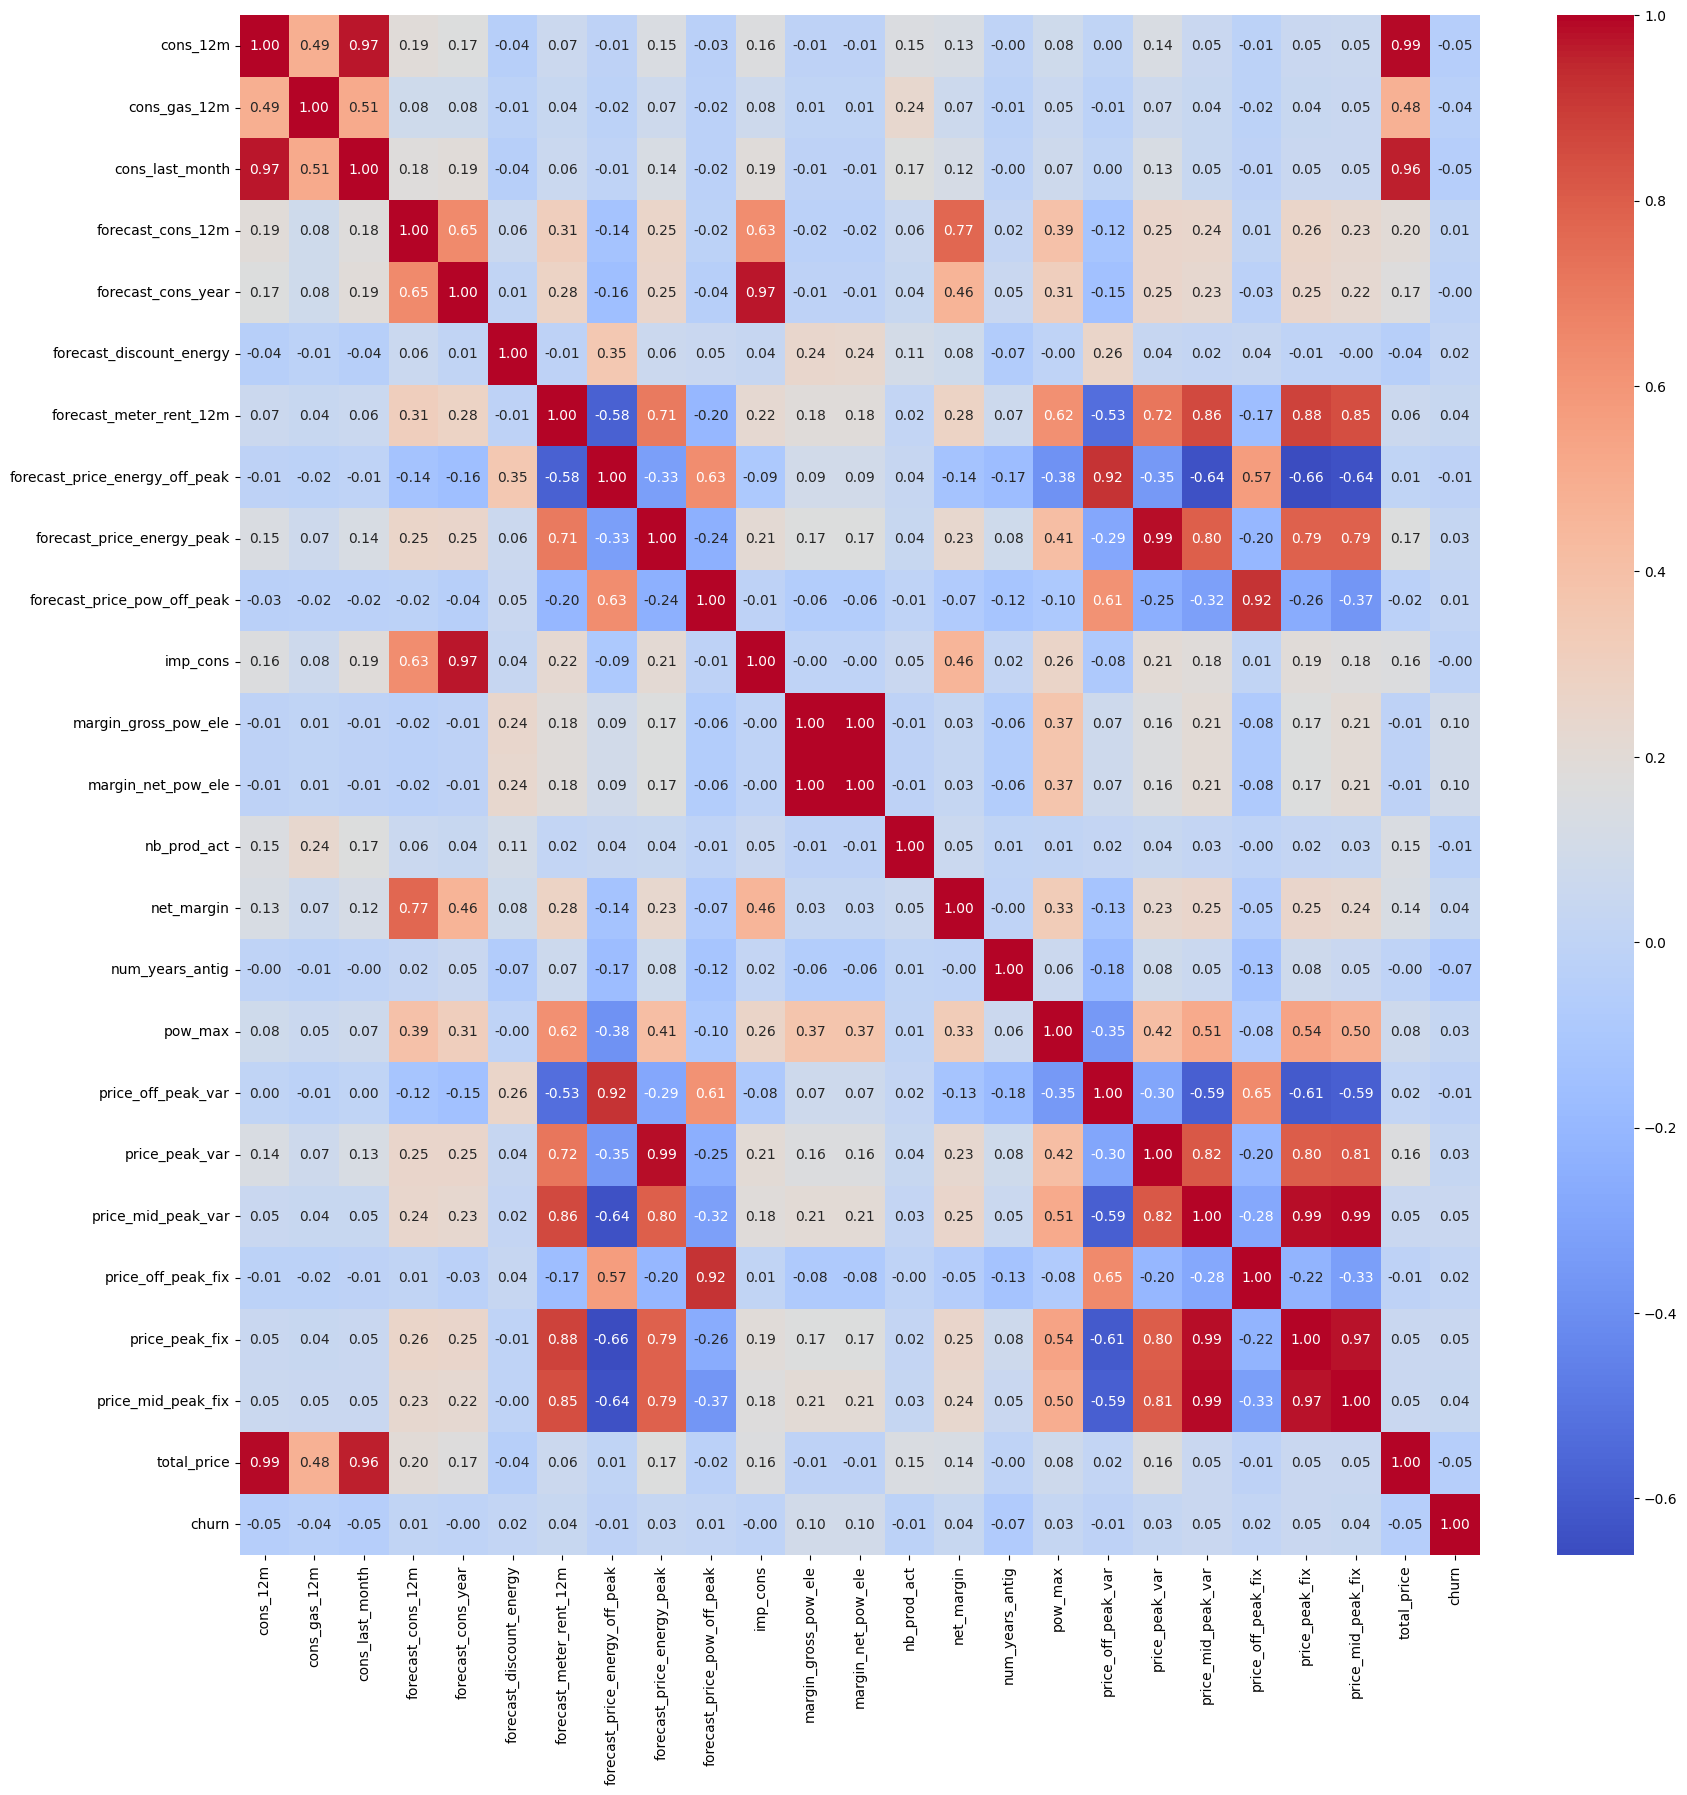

In [103]:
# 상관계수 매트릭스 도출
total2_corr = total2_df.corr(numeric_only=True)
total2_corr

# 히트맵 시각화 
plt.figure(figsize=(20, 20))
sns.heatmap(total2_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()